In [1]:
import tensorflow
import cv2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from crfrnn_model import get_crfrnn_model_def

Using TensorFlow backend.


In [4]:
import numpy as np

In [5]:
model = get_crfrnn_model_def()

In [25]:
model.load_weights('crfrnn_keras_model.h5')

In [7]:
def pad_image(im, height=500, width=500):
    channels = 1 if len(im.shape) == 2 else 3
    img_h, img_w = im.shape[:2]
    if img_h > height or img_w > width:
        raise ValueError("Please resize your images to be not bigger than {} x {}.".format(height, width))
        
    pad_h = height - img_h
    pad_w = width - img_w
    if channels == 1:
        im = np.pad(im, pad_width=((0, pad_h), (0, pad_w)), mode='constant', constant_values=0)
        return im.astype(np.float32).reshape(1, height, width, 1)
    
    im = np.pad(im, pad_width=((0, pad_h), (0, pad_w), (0, 0)), mode='constant', constant_values=0)
    return im.astype(np.float32).reshape(1, height, width, 3)

In [6]:
# images = np.array([pad_image(cv2.imread("/Users/danilonunes/workspace/imret2/data/imgs/resized/a_abbey_abbey_000006.png")),
#                    pad_image(cv2.imread("/Users/danilonunes/workspace/imret2/data/imgs/resized/a_abbey_abbey_000004.png"))]).squeeze()
# labels = np.array([pad_image(cv2.imread("/Users/danilonunes/workspace/imret2/data/imgs/mark/a_abbey_abbey_000006.png", 0)),
#                    pad_image(cv2.imread("/Users/danilonunes/workspace/imret2/data/imgs/resized/a_abbey_abbey_000004.png", 0))]).squeeze()[:, :, :, np.newaxis]

In [15]:
import util
imname = "/Users/danilonunes/workspace/imret2/data/imgs/resized/a_abbey_abbey_000006.png"
i1, _, _ = util.get_preprocessed_image(imname)
original = cv2.imread(imname)

In [26]:
predictions = model.predict(i1)

In [27]:
segmentation = predictions[0].argmax(axis=2)
print(segmentation.shape)

(500, 500)


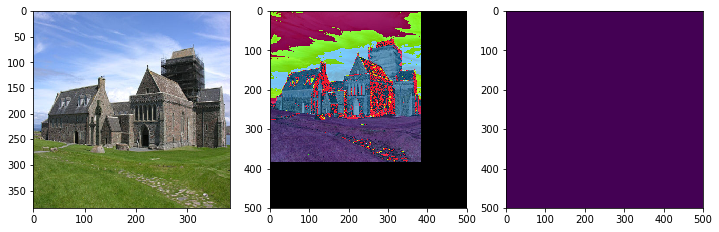

In [28]:
plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.imshow(original[:, :, (2, 1, 0)])
plt.subplot(132)
plt.imshow(i1[0])
plt.subplot(133)
plt.imshow(segmentation)

In [ ]:
from imret